In [1]:
import os
import json
import numpy as np

import matplotlib.pyplot as plt

In [76]:
def clean_string(path):
    path = path.replace(".", "_")
    path = path.replace("/", "_")
    return path

def plot(path, line_colors, param, param_title):
    results = {
        'write_data': None,
        'seq_data': None,
        'rand_data': None
    }
    filenames = [
        os.path.join(path, "write.json"),
        os.path.join(path, "seq.json"),
        os.path.join(path, "rand.json")
    ]
    for filename, line_color in zip(filenames, line_colors):
        with open(filename, 'r') as f:
            results[f'{filename[:-5]}_data'] = json.loads(f.read())['datas']  

        x = list()
        y = list()
        for itr in results[f'{filename[:-5]}_data']:
            x.append(int(itr['sec']))
            y.append(float(itr[param]))
            
        if filename.endswith("write.json"):
            x = x[:120]
            y = y[:120]
        
        print(len(x))
        print(len(y))
        
        plt.plot(x, y, markersize=10, linewidth=3.0, color=line_color)

    plt.legend(['Write', 'Sequential read', 'Random read'])
    plt.xlabel('Time (s)')
    plt.ylabel(f"{param_title}")
    path = clean_string(path)
    title = "8N/64OSD/18TH/180S"
    savename = clean_string(title)
    plt.title(title)
    plt.savefig(f"{savename}.pdf", bbox='tight')
    plt.show()
    plt.cla()
    plt.clf()

In [75]:
results='../../results/8nodes64osds/weak_scale_18_180'

91
91
103
103
120
120


/var/folders/v6/yf2_m27929b9ms5vf1k6vvpw0000gn/T/ipykernel_46917/2175970542.py:43: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"{savename}.pdf", bbox='tight')


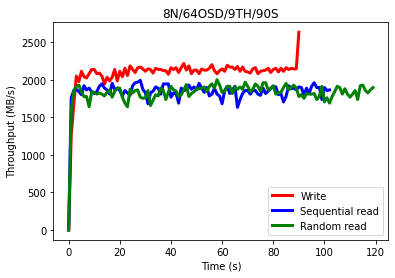

<Figure size 432x288 with 0 Axes>

In [74]:
for num_osd in os.listdir(results):
    for object_size in os.listdir(os.path.join(results, num_osd)):
        data_path = os.path.join(results, num_osd, object_size)
        plot(data_path, ['red', 'blue', 'green'], 'cur_bw', 'Throughput (MB/s)')